In [2]:
import Pkg
Pkg.add(url="https://github.com/lucabrugnolini/VectorAutoregressions.jl")

     Cloning git-repo `https://github.com/lucabrugnolini/VectorAutoregressions.jl`
    Updating git-repo `https://github.com/lucabrugnolini/VectorAutoregressions.jl`
    Updating registry at `C:\Users\matsz\.julia\registries\General.toml`
   Resolving package versions...
   Installed EllipsisNotation ─ v0.4.0
   Installed GrowableArrays ─── v0.1.0
    Updating `C:\Users\matsz\.julia\environments\v1.10\Project.toml`
  [dd6ac5f8] + VectorAutoregressions v0.1.0 `https://github.com/lucabrugnolini/VectorAutoregressions.jl#master`
    Updating `C:\Users\matsz\.julia\environments\v1.10\Manifest.toml`
⌅ [da5c29d0] + EllipsisNotation v0.4.0
  [7ebbc34c] + GrowableArrays v0.1.0
  [dd6ac5f8] + VectorAutoregressions v0.1.0 `https://github.com/lucabrugnolini/VectorAutoregressions.jl#master`
        Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated -m`
Precompiling project...
  ✓ EllipsisNotation
  ✓ 

In [20]:
import Pkg
Pkg.add("Revise")

    Updating registry at `C:\Users\matsz\.julia\registries\General.toml`
   Resolving package versions...
   Installed CodeTracking ───── v1.3.6
   Installed LoweredCodeUtils ─ v3.0.1
   Installed JuliaInterpreter ─ v0.9.33
   Installed Revise ─────────── v3.5.18
    Updating `C:\Users\matsz\.julia\environments\v1.10\Project.toml`
  [295af30f] + Revise v3.5.18
    Updating `C:\Users\matsz\.julia\environments\v1.10\Manifest.toml`
  [da1fd8a2] + CodeTracking v1.3.6
  [aa1ae85d] + JuliaInterpreter v0.9.33
  [6f1432cf] + LoweredCodeUtils v3.0.1
  [295af30f] + Revise v3.5.18
Precompiling project...
  ✓ CodeTracking
  ✓ JuliaInterpreter
  ✓ LoweredCodeUtils
  ✓ Revise
  4 dependencies successfully precompiled in 53 seconds. 534 already precompiled.


In [1]:
using Revise
using Turing, MCMCChains
using XLSX
using DataFrames, TimeSeries
using StatsPlots
using LinearAlgebra
using VectorAutoregressions
using CSV
using Test
using MCMCChains
using StatsBase
include("utils.jl")

print_percentiles (generic function with 2 methods)

In [2]:
columns = [:Date, :short_us, :real_us, :term_us]
data_df = DataFrame(XLSX.readtable("assets_data_03.24.xlsx", "Macro_Data"; infer_eltypes=true))[2:end, columns]
dropmissing!(data_df, disallowmissing=true)
macro_data = TimeArray(data_df; timestamp = :Date)

209×3 TimeArray{Float64, 2, Date, Matrix{Float64}} 1972-01-01 to 2024-01-01
┌────────────┬────────────┬──────────────┬─────────────┐
│            │ short_us   │ real_us      │ term_us     │
├────────────┼────────────┼──────────────┼─────────────┤
│ 1972-01-01 │     0.0388 │    0.0023571 │   0.0215333 │
│ 1972-04-01 │     0.0455 │   0.00326571 │   0.0159333 │
│ 1972-07-01 │  0.0493333 │   0.00268831 │   0.0135667 │
│ 1972-10-01 │      0.053 │   0.00368448 │   0.0107333 │
│ 1973-01-01 │      0.064 │   0.00337313 │  0.00203333 │
│ 1973-04-01 │  0.0767333 │  -0.00326431 │ -0.00866667 │
│ 1973-07-01 │   0.103533 │   0.00377342 │  -0.0314667 │
│ 1973-10-01 │  0.0923667 │   5.89786e-5 │  -0.0248333 │
│     ⋮      │     ⋮      │      ⋮       │      ⋮      │
│ 2022-07-01 │  0.0282333 │  -0.00602734 │  0.00283333 │
│ 2022-10-01 │  0.0427333 │   0.00696215 │ -0.00443333 │
│ 2023-01-01 │  0.0475333 │   0.00141827 │  -0.0110667 │
│ 2023-04-01 │  0.0513333 │  0.000898898 │     -0.0154 │
│ 2023-07-01

In [3]:
data_df = DataFrame(XLSX.readtable("assets_data_03.24.xlsx", "Indexes"; infer_eltypes=true))[1:end, [:Date, :USA_Net]]
dropmissing!(data_df, disallowmissing=true)
data = TimeArray(data_df; timestamp = :Date)
data = collapse(data, Dates.quarter, last)

dates = timestamp(data) .+ Day(1)

data = TimeArray(data; timestamp = dates)

equity = percentchange(data, :log)

205×1 TimeArray{Float64, 1, Date, Vector{Float64}} 1973-04-01 to 2024-04-01
┌────────────┬────────────┐
│            │ USA_Net    │
├────────────┼────────────┤
│ 1973-04-01 │ -0.0833335 │
│ 1973-07-01 │ -0.0532413 │
│ 1973-10-01 │  0.0402782 │
│ 1974-01-01 │ -0.0900348 │
│ 1974-04-01 │ -0.0428685 │
│ 1974-07-01 │ -0.0874197 │
│ 1974-10-01 │  -0.301121 │
│ 1975-01-01 │  0.0939096 │
│     ⋮      │     ⋮      │
│ 2022-10-01 │ -0.0493364 │
│ 2023-01-01 │  0.0674734 │
│ 2023-04-01 │  0.0731963 │
│ 2023-07-01 │  0.0824719 │
│ 2023-10-01 │ -0.0322941 │
│ 2024-01-01 │   0.111622 │
│ 2024-04-01 │  0.0979943 │
└────────────┴────────────┘
           190 rows omitted

In [3]:
mean(equity) .* 4

1×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2024-04-01 to 2024-04-01
┌────────────┬───────────┐
│            │ USA_Net   │
├────────────┼───────────┤
│ 2024-04-01 │ 0.0917981 │
└────────────┴───────────┘

In [86]:
e_premium = equity .- macro_data[:short_us] ./ 4
TimeSeries.rename!(e_premium, :e_premium)

204×1 TimeArray{Float64, 1, Date, Vector{Float64}} 1973-04-01 to 2024-01-01
┌────────────┬────────────┐
│            │ e_premium  │
├────────────┼────────────┤
│ 1973-04-01 │  -0.102517 │
│ 1973-07-01 │ -0.0791246 │
│ 1973-10-01 │  0.0171865 │
│ 1974-01-01 │  -0.111635 │
│ 1974-04-01 │ -0.0702268 │
│ 1974-07-01 │  -0.117486 │
│ 1974-10-01 │  -0.324538 │
│ 1975-01-01 │  0.0771846 │
│     ⋮      │     ⋮      │
│ 2022-07-01 │   -0.19188 │
│ 2022-10-01 │ -0.0600197 │
│ 2023-01-01 │    0.05559 │
│ 2023-04-01 │   0.060363 │
│ 2023-07-01 │  0.0689052 │
│ 2023-10-01 │ -0.0457858 │
│ 2024-01-01 │  0.0984798 │
└────────────┴────────────┘
           189 rows omitted

In [87]:
mean(e_premium) .* 4

1×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2024-01-01 to 2024-01-01
┌────────────┬───────────┐
│            │ e_premium │
├────────────┼───────────┤
│ 2024-01-01 │ 0.0403383 │
└────────────┴───────────┘

In [88]:
returns = merge(macro_data, e_premium)
returns = from(returns,Date(1998,01,01))

105×4 TimeArray{Float64, 2, Date, Matrix{Float64}} 1998-01-01 to 2024-01-01
┌────────────┬────────────┬─────────────┬─────────────┬─────────────┐
│            │ short_us   │ real_us     │ term_us     │ e_premium   │
├────────────┼────────────┼─────────────┼─────────────┼─────────────┤
│ 1998-01-01 │  0.0555333 │   0.0111077 │ 0.000333333 │   0.0197541 │
│ 1998-04-01 │     0.0559 │  0.00853932 │  6.66667e-5 │    0.116551 │
│ 1998-07-01 │  0.0552667 │  0.00983868 │ -0.00323333 │   0.0190373 │
│ 1998-10-01 │  0.0519667 │  0.00944597 │ -0.00526667 │   -0.109874 │
│ 1999-01-01 │      0.049 │  0.00832049 │ 0.000833333 │    0.184696 │
│ 1999-04-01 │  0.0497667 │  0.00269132 │  0.00563333 │   0.0413983 │
│ 1999-07-01 │  0.0538333 │  0.00717043 │       0.005 │   0.0500675 │
│ 1999-10-01 │     0.0606 │  0.00887633 │      0.0008 │  -0.0854678 │
│     ⋮      │     ⋮      │      ⋮      │      ⋮      │      ⋮      │
│ 2022-07-01 │  0.0282333 │ -0.00602734 │  0.00283333 │    -0.19188 │
│ 2022-10-01 │

In [89]:
returns_summarystats(returns,1)

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
short_us,0.021106,0.0662667,0.0227729,0.0429667,0.001,0.61336,0.003,0.952656,-1.11612,1.07898,0.0153
real_us,0.00866051,0.0357101,-0.000559667,0.00539319,-0.0258859,0.235023,-0.00533607,0.454624,2.72792,-0.0646229,-0.000308259
term_us,0.012995,0.0351,0.0114456,0.0214667,-0.0154,-0.0235746,0.0008,0.916879,-0.996401,0.880767,0.0119667
e_premium,0.0879907,0.195054,0.0129518,0.0628028,-0.256353,-0.768065,-0.0300029,0.0193044,0.52863,0.147195,0.0251424


In [9]:
CSV.write("usa.csv",returns)

"usa.csv"

In [16]:
model = VAR(values(returns), 1, true)

VAR([0.0555333333333333 0.011107723770672668 0.00033333333333339377 0.019754099837368345; 0.0559 0.008539319955514555 6.666666666670096e-5 0.11655100560610461; … ; 0.0539666666666666 0.012356876445824887 -0.009566666666666598 -0.045785771432493155; 0.052566666666666595 0.002684271890795644 -0.010966666666666597 0.09847984128758931], [0.0559 0.0552666666666667 … 0.0539666666666666 0.052566666666666595; 0.008539319955514555 0.009838684899296287 … 0.012356876445824887 0.002684271890795644; 6.666666666670096e-5 -0.0032333333333334074 … -0.009566666666666598 -0.010966666666666597; 0.11655100560610461 0.019037337735736595 … -0.045785771432493155 0.09847984128758931], [1.0 1.0 … 1.0 1.0; 0.0555333333333333 0.0559 … 0.054266666666666595 0.0539666666666666; … ; 0.00033333333333339377 6.666666666670096e-5 … -0.012766666666666593 -0.009566666666666598; 0.019754099837368345 0.11655100560610461 … 0.06890518427257061 -0.045785771432493155], [-0.0017676043051446358 1.0510889298864647 … 0.035008238204

In [220]:
round.(model.β, digits=6)

4×5 Matrix{Float64}:
 -0.001066   1.01681   -0.229077  0.057198   0.015635
 -0.004058   0.09257    0.450456  0.090799   0.003039
  0.001739  -0.01772    0.128329  0.889771  -0.011675
  0.015426  -0.283758   0.77338   0.702965   0.034438

In [221]:
round.(model.Σ, digits=4)

4×4 Matrix{Float64}:
  0.0001   0.0  -0.0001   0.0001
  0.0      0.0  -0.0     -0.0
 -0.0001  -0.0   0.0001  -0.0
  0.0001  -0.0  -0.0      0.0071

In [13]:
A = [1 2; 3 4]


2×2 Matrix{Int64}:
 1  2
 3  4

In [14]:
B = [1 2; 3 4]

2×2 Matrix{Int64}:
 1  2
 3  4

In [15]:
A * B

2×2 Matrix{Int64}:
  7  10
 15  22

In [16]:
dot(A,B)

30

In [17]:
kron(A,B)

4×4 Matrix{Int64}:
 1   2   2   4
 3   4   6   8
 3   6   4   8
 9  12  12  16

- [ ] Normal Wishart Prior gibs sampler
- [ ] draw posterior parameters
- [ ] describe posterior parameters
- [ ] simulate
- [ ] plot simulation
- [ ] estimate momoments estimation
- [ ] calculate waic i inne miary

In [18]:
test_data = values(returns)[154:end,:]

51×4 Matrix{Float64}:
 0.00286667  -0.00336044    0.0214      -3.20364e-5
 0.00423333   0.00257951    0.0162333   -0.153821
 0.0033      -0.00710024    0.0170667    0.108295
 0.003       -0.00749158    0.0152333    0.118372
 0.00266667  -0.00152444    0.0137667   -0.0329988
 0.00233333   0.000222809   0.0147333    0.0596389
 0.0022      -0.00533607    0.0173      -0.00491949
 0.00196667  -0.00490369    0.018        0.099248
 0.00123333  -0.00346436    0.0258667    0.0251424
 0.00126667   0.00311116    0.0262       0.0540249
 ⋮                                      
 0.00443333  -0.0214703     0.0149667    0.0939515
 0.0137      -0.0258859     0.0156      -0.05795
 0.0282333   -0.00602734    0.00283333  -0.19188
 0.0427333    0.00696215   -0.00443333  -0.0600197
 0.0475333    0.00141827   -0.0110667    0.05559
 0.0513333    0.000898898  -0.0154       0.060363
 0.0542667    0.00484838   -0.0127667    0.0689052
 0.0539667    0.0123569    -0.00956667  -0.0457858
 0.0525667    0.00268427   -

In [217]:
model = VAR(test_data, 1, true)
C_OLS = round.(model.β, digits=4)

4×5 Matrix{Float64}:
 -0.0048   1.2238  -0.2986   0.2416  -0.0187
 -0.0095   0.3539   0.3877   0.308    0.0039
  0.0054  -0.2329   0.1603   0.7074   0.0179
  0.1055  -2.8488   2.556   -3.155   -0.1553

In [218]:
round.(model.Σ,digits=4)

4×4 Matrix{Float64}:
  0.0  -0.0     -0.0   0.0
 -0.0   0.0     -0.0  -0.0002
 -0.0  -0.0      0.0   0.0
  0.0  -0.0002   0.0   0.0061

In [187]:
sqrt.(diag(model.Σ))

4-element Vector{Float64}:
 0.0030705001687552605
 0.006538782935222306
 0.002766739441597141
 0.07834819743756467

## Normal Wishart Prior gibs sampler
- [x] draw covariance matrix
- [] draw coeff - zrobić, aby działało
- refactor, to ols model, i NormalWishartBVAR
- zrobić testy

In [8]:
includet("financial_bvar_temp.jl")

In [11]:
using .FinancialBVAR

In [90]:
model = NormalWishartBVAR(returns)

round.(transpose(model.C_OLS), digits=4)


4×5 Matrix{Float64}:
 -0.0018   1.0511  -0.2779   0.035    0.0015
 -0.0065   0.2208   0.2151   0.0821  -0.0009
  0.0031  -0.0871   0.2271   0.9036  -0.0025
  0.0476  -1.1081   0.24    -0.8301   0.0039

In [91]:
model.var_names

4-element Vector{Symbol}:
 :short_us
 :real_us
 :term_us
 :e_premium

In [10]:
round.(model.S_OLS,digits=4)

4×4 Matrix{Float64}:
  0.0019   0.0001  -0.0013   0.0099
  0.0001   0.0049  -0.0009  -0.0104
 -0.0013  -0.0009   0.0019  -0.0006
  0.0099  -0.0104  -0.0006   0.7796

In [14]:
sqrt.(diag(model.S_OLS))

4-element Vector{Float64}:
 0.04405370901872025
 0.07021910830703326
 0.04371380405220212
 0.8829510998859933

In [15]:
model.var_names

4-element Vector{Symbol}:
 :short_us
 :real_us
 :term_us
 :USA_Net_short_us

In [92]:
sample_posterior!(model, 10000,200)
sig = median(model.Σ[:,:,:],dims=1)

1×4×4 Array{Float64, 3}:
[:, :, 1] =
 2.01146e-5  7.40682e-7  -1.33835e-5  0.000101739

[:, :, 2] =
 7.40682e-7  5.11244e-5  -9.28177e-6  -0.000104571

[:, :, 3] =
 -1.33835e-5  -9.28177e-6  1.97654e-5  -6.14472e-6

[:, :, 4] =
 0.000101739  -0.000104571  -6.14472e-6  0.00809035

In [17]:
model.Β

missing

In [75]:
describe(model.Β[:,16])

Summary Stats:
Length:         10000
Missing Count:  0
Mean:           0.047325
Std. Deviation: 0.027774
Minimum:        -0.063027
1st Quartile:   0.028543
Median:         0.047299
3rd Quartile:   0.065781
Maximum:        0.161802
Type:           Float64


In [14]:
chn = Chains(model.Β)

MethodError: MethodError: no method matching Chains(::Missing)

Closest candidates are:
  Chains(!Matched::Chains, !Matched::Nothing)
   @ MCMCChains C:\Users\matsz\.julia\packages\MCMCChains\zFCJy\src\chains.jl:119
  Chains(!Matched::Chains, !Matched::Union{AbstractString, Symbol})
   @ MCMCChains C:\Users\matsz\.julia\packages\MCMCChains\zFCJy\src\chains.jl:104
  Chains(!Matched::Chains, !Matched::Any)
   @ MCMCChains C:\Users\matsz\.julia\packages\MCMCChains\zFCJy\src\chains.jl:105
  ...


In [16]:
summarystats(chn)

UndefVarError: UndefVarError: `chn` not defined

In [70]:
q = quantile(chn)

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

     param_1   -0.0045   -0.0027   -0.0017   -0.0008    0.0010
     param_2    0.9802    1.0267    1.0503    1.0745    1.1213
     param_3   -0.3996   -0.3175   -0.2760   -0.2349   -0.1541
     param_4   -0.0713   -0.0010    0.0346    0.0712    0.1422
     param_5   -0.0086   -0.0020    0.0014    0.0049    0.0117
     param_6   -0.0108   -0.0079   -0.0064   -0.0050   -0.0021
     param_7    0.1098    0.1824    0.2198    0.2588    0.3308
     param_8    0.0214    0.1480    0.2135    0.2802    0.4118
     param_9   -0.0860    0.0243    0.0817    0.1387    0.2526
    param_10   -0.0178   -0.0064   -0.0009    0.0045    0.0152
    param_11    0.0004    0.0022    0.0031    0.0041    0.0058
    param_12   -0.1553   -0.1101   -0.0862   -0.0631   -0.0183
    param_13    0.1069    0.1847    0.2271    0.2672    0.3478
    param_14    0.7996    0.8687    0.9038

In [21]:
model.C_OLS

5×4 Matrix{Float64}:
 -0.0017676   -0.00645586    0.00313736   0.047578
  1.05109      0.220767     -0.0870537   -1.10812
 -0.277901     0.215126      0.227075     0.240035
  0.0350082    0.0821337     0.90364     -0.830123
  0.00147081  -0.000899339  -0.00252851   0.00394311

In [22]:
model.S_OLS

4×4 Matrix{Float64}:
  0.00194073   7.18747e-5   -0.00129464    0.00985649
  7.18747e-5   0.00493072   -0.000902465  -0.0103872
 -0.00129464  -0.000902465   0.0019109    -0.000609731
  0.00985649  -0.0103872    -0.000609731   0.779603

In [23]:
reshape(model.S_OLS,16)

16-element Vector{Float64}:
  0.001940729278306074
  7.187466116563129e-5
 -0.0012946446031319788
  0.009856494761906852
  7.187466116563129e-5
  0.004930723171434869
 -0.0009024650709955732
 -0.010387219688694715
 -0.0012946446031319788
 -0.0009024650709955732
  0.0019108966647143225
 -0.0006097306022857053
  0.009856494761906852
 -0.010387219688694715
 -0.0006097306022857053
  0.7796026447898853

In [24]:
median(model.Σ,dims=1)

MethodError: MethodError: no method matching median(::Missing; dims::Int64)

Closest candidates are:
  median(::Any) got unsupported keyword argument "dims"
   @ Statistics C:\Users\matsz\.julia\juliaup\julia-1.10.2+0.x64.w64.mingw32\share\julia\stdlib\v1.10\Statistics\src\Statistics.jl:858
  median(!Matched::DiscreteUniform) got unsupported keyword argument "dims"
   @ Distributions C:\Users\matsz\.julia\packages\Distributions\UaWBm\src\univariate\discrete\discreteuniform.jl:54
  median(!Matched::Kolmogorov) got unsupported keyword argument "dims"
   @ Distributions C:\Users\matsz\.julia\packages\Distributions\UaWBm\src\univariate\continuous\kolmogorov.jl:27
  ...


In [93]:
posterior_summary(model)

"short_us coefficients"

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

       const   -0.0045   -0.0027   -0.0018   -0.0008    0.0010
    short_us    0.9817    1.0275    1.0515    1.0749    1.1199
     real_us   -0.4007   -0.3211   -0.2780   -0.2371   -0.1585
     term_us   -0.0715   -0.0006    0.0346    0.0705    0.1408
   e_premium   -0.0083   -0.0019    0.0015    0.0050    0.0118


"real_us coefficients"

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

       const   -0.0109   -0.0079   -0.0064   -0.0050   -0.0022
    short_us    0.1121    0.1821    0.2203    0.2593    0.3299
     real_us    0.0166    0.1493    0.2126    0.2798    0.4098
     term_us   -0.0813    0.0244    0.0819    0.1393    0.2509
   e_premium   -0.0170   -0.0065   -0.0011    0.0044    0.0151


"term_us coefficients"

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

       const    0.0004    0.0022    0.0031    0.0041    0.0058
    short_us   -0.1558   -0.1106   -0.0874   -0.0640   -0.0186
     real_us    0.1091    0.1867    0.2281    0.2698    0.3476
     term_us    0.7997    0.8689    0.9046    0.9398    1.0087
   e_premium   -0.0125   -0.0059   -0.0026    0.0008    0.0076


"e_premium coefficients"

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

       const   -0.0068    0.0287    0.0476    0.0658    0.1022
    short_us   -2.4884   -1.5746   -1.1037   -0.6322    0.3018
     real_us   -2.2101   -0.5997    0.2449    1.0848    2.6305
     term_us   -2.8690   -1.5349   -0.8117   -0.0997    1.2833
   e_premium   -0.1956   -0.0637    0.0045    0.0760    0.2062


"correlation matrix"

Quantiles
           parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
               Symbol   Float64   Float64   Float64   Float64   Float64 

    short_us_short_us    0.0039    0.0043    0.0045    0.0047    0.0052
     short_us_real_us   -0.1742   -0.0452    0.0233    0.0925    0.2178
     short_us_term_us   -0.7676   -0.7093   -0.6734   -0.6346   -0.5486
   short_us_e_premium    0.0588    0.1883    0.2546    0.3156    0.4317
     real_us_short_us   -0.1742   -0.0452    0.0233    0.0925    0.2178
      real_us_real_us    0.0062    0.0068    0.0072    0.0075    0.0083
      real_us_term_us   -0.4688   -0.3573   -0.2963   -0.2309   -0.1073
    real_us_e_premium   -0.3482   -0.2332   -0.1655   -0.0970    0.0310
     term_us_short_us   -0.7676   -0.7093   -0.6734   -0.6346   -0.5486
      term_us_real_us   -0.4688   -0.3573   -0.2963   -0.2309   -0.1073
      term_us_term_us    0.0039    0.0042    0.0044    0.0047    0.0051
    term_us_e_premium   -0.2148   -0.0829   -0.0154

In [113]:
model.Β

10000×20 Matrix{Float64}:
 -0.00382114   1.10015   -0.444234  …  -1.27815    -0.665215   -0.13001
 -0.0033328    1.05823   -0.347937      0.791967    0.199794    0.139458
 -0.00147307   1.05088   -0.140859      0.0774597   0.754526   -0.255389
  0.000403591  0.998156  -0.235929     -0.104761   -1.03164     0.0763693
 -0.00215082   1.06397   -0.280583      2.33319    -0.62202     0.17258
 -0.00091652   1.03488   -0.272179  …  -0.988576   -2.39875    -0.129482
 -0.00313989   1.07348   -0.181092      0.519945   -1.52504    -0.112603
 -0.00141471   1.03699   -0.236145      1.80028    -0.683227    0.106216
 -0.002861     1.07541   -0.243143     -0.0922094   0.0950159  -0.012054
 -0.00422418   1.10017   -0.351066     -0.491836   -1.56576    -0.0810124
  ⋮                                 ⋱                          
 -0.00227819   1.05981   -0.303143      0.225839    0.974219    0.0900124
 -0.00117524   1.04095   -0.286576      0.323748    0.150018   -0.0135542
 -0.00127609   1.00214   -0.2462

In [122]:
model.C_OLS

5×4 Matrix{Float64}:
 -0.0017676   -0.00645586    0.00313736   0.047578
  1.05109      0.220767     -0.0870537   -1.10812
 -0.277901     0.215126      0.227075     0.240035
  0.0350082    0.0821337     0.90364     -0.830123
  0.00147081  -0.000899339  -0.00252851   0.00394311

In [124]:
v = vec(model.C_OLS)

20-element Vector{Float64}:
 -0.0017676043051446002
  1.0510889298864643
 -0.27790132451529787
  0.03500823820424507
  0.001470812398320134
 -0.006455860808879818
  0.22076737070581293
  0.21512627194270958
  0.08213374920592806
 -0.0008993386414067961
  0.0031373644216740634
 -0.08705370868639778
  0.2270751344527374
  0.9036402286353633
 -0.002528513548818157
  0.047578026807329726
 -1.1081151646442646
  0.24003478817842688
 -0.830123200932755
  0.0039431140116560045

In [125]:
reshape(v, 5, 4)

5×4 Matrix{Float64}:
 -0.0017676   -0.00645586    0.00313736   0.047578
  1.05109      0.220767     -0.0870537   -1.10812
 -0.277901     0.215126      0.227075     0.240035
  0.0350082    0.0821337     0.90364     -0.830123
  0.00147081  -0.000899339  -0.00252851   0.00394311

In [119]:
input =reshape(1:12,2,6)

2×6 reshape(::UnitRange{Int64}, 2, 6) with eltype Int64:
 1  3  5  7   9  11
 2  4  6  8  10  12

In [121]:
reshape(transpose(input), 2, 3, 2)

2×3×2 reshape(transpose(reshape(::UnitRange{Int64}, 2, 6)), 2, 3, 2) with eltype Int64:
[:, :, 1] =
 1  5   9
 3  7  11

[:, :, 2] =
 2  6  10
 4  8  12

In [127]:
model.Β

10000×20 Matrix{Float64}:
 -0.00382114   1.10015   -0.444234  …  -1.27815    -0.665215   -0.13001
 -0.0033328    1.05823   -0.347937      0.791967    0.199794    0.139458
 -0.00147307   1.05088   -0.140859      0.0774597   0.754526   -0.255389
  0.000403591  0.998156  -0.235929     -0.104761   -1.03164     0.0763693
 -0.00215082   1.06397   -0.280583      2.33319    -0.62202     0.17258
 -0.00091652   1.03488   -0.272179  …  -0.988576   -2.39875    -0.129482
 -0.00313989   1.07348   -0.181092      0.519945   -1.52504    -0.112603
 -0.00141471   1.03699   -0.236145      1.80028    -0.683227    0.106216
 -0.002861     1.07541   -0.243143     -0.0922094   0.0950159  -0.012054
 -0.00422418   1.10017   -0.351066     -0.491836   -1.56576    -0.0810124
  ⋮                                 ⋱                          
 -0.00227819   1.05981   -0.303143      0.225839    0.974219    0.0900124
 -0.00117524   1.04095   -0.286576      0.323748    0.150018   -0.0135542
 -0.00127609   1.00214   -0.2462

In [146]:
expected = reshape(model.Β[1,:,:],5,4)

5×4 Matrix{Float64}:
 -0.00382114  -0.0057036    0.00257402  -0.000715201
  1.10015      0.197027    -0.0855839    0.246237
 -0.444234     0.251978     0.296473    -1.27815
  0.0853789    0.0721154    0.894767    -0.665215
 -0.0126897   -0.00560155   0.0147006   -0.13001

In [142]:
res = reshape(model.Β, 10000, 4+1, 4)[2,:,:]

5×4 Matrix{Float64}:
 -0.0033328   -0.00665756   0.00323212   0.0251674
  1.05823      0.217851    -0.0561125   -0.788824
 -0.347937     0.126412     0.302927     0.791967
  0.0678509    0.102161     0.927232     0.199794
 -0.00239725   0.00750565  -0.00257045   0.139458

In [144]:
using Test

@test res == expected

Test Passed

In [171]:
1

2

In [182]:
s = simulate(model, 40, 4)

4×40000×41 Array{Float64, 3}:
[:, :, 1] =
  0.0525667    0.0525667    0.0525667   …   0.0525667    0.0525667
  0.00268427   0.00268427   0.00268427      0.00268427   0.00268427
 -0.0109667   -0.0109667   -0.0109667      -0.0109667   -0.0109667
  0.0984798    0.0984798    0.0984798       0.0984798    0.0984798

[:, :, 2] =
  0.0506129    0.0506628    0.0505875   …   0.0533009    0.0533114
  0.00398424   0.00400603   0.00396761      0.00596657   0.00599893
 -0.00950925  -0.00947211  -0.00949407     -0.0128334   -0.012768
  0.00332302   0.00326987   0.00326237      0.00123642   0.00119316

[:, :, 3] =
  0.0492504    0.0492542    0.0491881   …   0.0524323    0.0524933
  0.00454632   0.00456866   0.0045827       0.00652569   0.00652555
 -0.00910372  -0.00899273  -0.00902691     -0.0130431   -0.0129386
  0.0125599    0.0125248    0.012571       -0.00312582  -0.00305289

;;; … 

[:, :, 39] =
  0.00947223   0.00948529   0.00963113  …   0.0370325    0.0368209
 -0.0046074   -0.00463533  -0.00460

In [184]:
print_percentiles(s[4,:,:],[.25,.5,.75],"test")

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0.25,0.0984798,-0.0142605,-0.0113707,-0.0115226,-0.0108546,-0.010148,-0.00926893,-0.0085546,-0.00796122,-0.00736732,-0.00679135,-0.00630607,-0.00597305,-0.0055483,-0.00520324,-0.00482226,-0.00445724,-0.00414192,-0.00377102,-0.003441,-0.00316635,-0.00292359,-0.00268561,-0.00245554,-0.00221792,-0.00207524,-0.0018804,-0.00170792,-0.0015226,-0.00137026,-0.00116496,-0.00104084,-0.000862333,-0.00076095,-0.000636388,-0.000516726,-0.000450329,-0.000359388,-0.000229972,-0.000111854,-1.47412e-5
0.5,0.0984798,-0.00024508,0.000825472,9.56293e-5,0.000550069,0.000899219,0.00136141,0.00168824,0.00208839,0.00242482,0.00279412,0.00319358,0.00368764,0.00405941,0.00440147,0.00471553,0.00499273,0.00529829,0.00556192,0.00585445,0.00613879,0.00640962,0.00666507,0.00693856,0.00720041,0.007449,0.0076547,0.00786306,0.00805316,0.00826749,0.0084388,0.00860208,0.00877704,0.00897732,0.00915867,0.00934713,0.00949526,0.00961429,0.00976422,0.00989263,0.0100179
0.75,0.0984798,0.0134102,0.0126338,0.0117357,0.0117784,0.0118019,0.0119494,0.0120231,0.0122477,0.0124913,0.0127116,0.012935,0.0132006,0.0135275,0.0138019,0.0140392,0.0143175,0.0145321,0.0147902,0.0150483,0.0152966,0.0155447,0.0158449,0.0160301,0.0162882,0.0164703,0.0167063,0.0169749,0.0172009,0.0174248,0.0176324,0.0178696,0.0181336,0.0183059,0.0184869,0.0186001,0.0187523,0.0189088,0.0190659,0.0191908,0.019331


In [185]:
names = ["short_us", "real_us", "term_us", "USA_Net_short_us"]
for i in 1:4    
    print_percentiles(s[i,:,:],[.05, .25,  .5, .75, .95], names[i]) 
end

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0.05,0.0525667,0.0507831,0.0485166,0.0460756,0.0436477,0.0413846,0.0393049,0.0373216,0.0354942,0.0337897,0.0321732,0.0306129,0.0291593,0.0278498,0.0266006,0.0254379,0.0243236,0.0232968,0.0223219,0.0213355,0.0204719,0.0195452,0.0186674,0.0179066,0.017143,0.016387,0.0157007,0.0150017,0.0143649,0.0137132,0.0130833,0.0124621,0.01185,0.0112537,0.0106627,0.0100716,0.0095987,0.00901171,0.00847762,0.00798233,0.00751074
0.25,0.0525667,0.0518218,0.0504428,0.0488672,0.0473138,0.0458354,0.0443713,0.0429868,0.0416817,0.0404578,0.0392767,0.0381623,0.0371231,0.0361283,0.03517,0.0342381,0.0333927,0.0325525,0.0317682,0.0310212,0.0302987,0.0296251,0.0289829,0.0283229,0.0277867,0.0272385,0.0267328,0.0262505,0.0257733,0.0253161,0.0247992,0.024333,0.0239379,0.0235141,0.02314,0.0227814,0.022454,0.0221131,0.0218009,0.0215341,0.0212416
0.5,0.0525667,0.0525317,0.0517609,0.0508242,0.0498848,0.0489564,0.0480281,0.0471649,0.0463326,0.0455375,0.0447568,0.0439954,0.0432678,0.0425806,0.0419149,0.0412846,0.0406364,0.040033,0.0394202,0.0388595,0.0383244,0.0378179,0.0373346,0.0368428,0.036399,0.0359305,0.0355022,0.0350964,0.0346786,0.0342828,0.0339208,0.0335698,0.0332372,0.0328841,0.0325872,0.0322815,0.0320136,0.0317277,0.0314504,0.0311871,0.0309691
0.75,0.0525667,0.0532258,0.0531443,0.0528887,0.0526234,0.0523699,0.052097,0.0518149,0.0515558,0.0513039,0.0510581,0.0508096,0.0505443,0.0503064,0.0500561,0.0498241,0.0495919,0.0493883,0.0491253,0.0489215,0.0487315,0.0485523,0.0483502,0.048175,0.0479956,0.047796,0.0475763,0.0474004,0.0472403,0.0471102,0.0469567,0.0468071,0.0466481,0.0464852,0.0463372,0.0462169,0.0460956,0.0459716,0.0458451,0.0457292,0.0456214
0.95,0.0525667,0.0542742,0.0551432,0.0560102,0.0568381,0.0577276,0.0586174,0.0594812,0.0603654,0.0612387,0.0621136,0.0629951,0.0639779,0.0649038,0.0659016,0.0668074,0.0677127,0.0686553,0.0696082,0.0706949,0.0718437,0.0729044,0.0741187,0.0752673,0.0764111,0.0775389,0.0786708,0.079755,0.0809239,0.0820765,0.0832155,0.0844289,0.085606,0.0870358,0.0883119,0.0895474,0.090732,0.0922583,0.0934878,0.0949514,0.0963841


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0.05,0.00268427,0.00197956,0.00232318,0.00235815,0.00233379,0.00227421,0.00215731,0.00200583,0.00181067,0.00157982,0.00131802,0.00105393,0.000808204,0.000564074,0.000333074,9.35134e-5,-0.000158184,-0.000395594,-0.000621863,-0.000839404,-0.00105812,-0.00125414,-0.00144012,-0.0016256,-0.00181943,-0.00199496,-0.00217347,-0.00231208,-0.00247504,-0.00260383,-0.00273403,-0.00284894,-0.00297341,-0.0030913,-0.003221,-0.00335242,-0.00348706,-0.00361887,-0.00373274,-0.00384224,-0.00396
0.25,0.00268427,0.00362287,0.00406406,0.00407508,0.0039831,0.00384909,0.0036598,0.00346872,0.0032808,0.0030836,0.00288293,0.00266967,0.00246802,0.00226265,0.00206359,0.00188089,0.0016975,0.00152313,0.00135531,0.00120362,0.00105406,0.000903462,0.000762265,0.000630175,0.000499718,0.000375772,0.000256212,0.000139749,2.15378e-5,-8.95054e-5,-0.000193205,-0.000289588,-0.000388647,-0.00047723,-0.000562992,-0.000649309,-0.000729422,-0.000800804,-0.00087361,-0.000942883,-0.00100528
0.5,0.00268427,0.00473012,0.00523927,0.00524915,0.00511025,0.0049393,0.00474756,0.00455534,0.00437165,0.00419818,0.00402078,0.00386244,0.00371015,0.00356375,0.00341594,0.00326907,0.00313103,0.00299646,0.00286703,0.00274526,0.00263038,0.00252007,0.00241508,0.00231011,0.00220943,0.00210878,0.00201379,0.00192741,0.00184388,0.00175867,0.00168116,0.00161282,0.00153409,0.00146557,0.00139937,0.00132801,0.00127208,0.00121334,0.00115286,0.00109727,0.00104107
0.75,0.00268427,0.00586824,0.00643785,0.00641994,0.00622463,0.00600863,0.00580447,0.00562545,0.00548127,0.00535389,0.005246,0.0051355,0.00504773,0.00497372,0.00488984,0.00482105,0.00476213,0.00470154,0.00463981,0.00459441,0.00453777,0.00449088,0.0044401,0.00438897,0.00434161,0.00429857,0.00425456,0.00420694,0.00416791,0.0041311,0.0040984,0.00406164,0.00402113,0.00397858,0.00393893,0.00389776,0.00386605,0.00384526,0.00382689,0.00379711,0.00376749
0.95,0.00268427,0.00745442,0.00809238,0.0081292,0.00791233,0.00765171,0.00747212,0.00734132,0.0072536,0.00722718,0.00724073,0.0073239,0.00736426,0.00744321,0.00752412,0.00765528,0.00778078,0.00789813,0.00801035,0.0081548,0.008306,0.00844646,0.00860877,0.00876538,0.00892564,0.00911128,0.00924911,0.00942842,0.00958197,0.00975959,0.00992849,0.0101765,0.0103891,0.0106432,0.0108808,0.0111115,0.0113079,0.0115539,0.0118278,0.0120217,0.0122903


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0.05,-0.0109667,-0.0127208,-0.0133939,-0.0140117,-0.0146013,-0.0151968,-0.015834,-0.0164742,-0.0170901,-0.0177069,-0.0183436,-0.0189927,-0.0196503,-0.0203589,-0.0210683,-0.0218002,-0.0225216,-0.0232359,-0.0240338,-0.0247966,-0.0255578,-0.026278,-0.0270787,-0.0279225,-0.0287142,-0.0295325,-0.0304151,-0.031318,-0.0322348,-0.0330907,-0.0339426,-0.0347932,-0.0357267,-0.0367109,-0.0377198,-0.0385948,-0.0396806,-0.0407655,-0.0417344,-0.0428568,-0.0439947
0.25,-0.0109667,-0.0117082,-0.0115567,-0.0112986,-0.0110251,-0.0107353,-0.0104947,-0.0102391,-0.00998554,-0.00973081,-0.00950837,-0.0092643,-0.00903482,-0.00882687,-0.00860865,-0.00838961,-0.00818752,-0.00800914,-0.00783511,-0.00766115,-0.00748517,-0.00728875,-0.00711087,-0.00695312,-0.0068186,-0.00665987,-0.00654474,-0.00642168,-0.00629379,-0.00614594,-0.00600223,-0.00588481,-0.0057849,-0.00568313,-0.00558364,-0.00545895,-0.00536712,-0.00529946,-0.00521372,-0.00510533,-0.00501463
0.5,-0.0109667,-0.0110187,-0.010326,-0.0095307,-0.00872569,-0.00795642,-0.00720144,-0.00647561,-0.00581406,-0.00518697,-0.00458638,-0.00401911,-0.00346014,-0.00294632,-0.00242359,-0.0019371,-0.00148432,-0.00104282,-0.000632341,-0.000216051,0.000176324,0.000548144,0.000896716,0.00122779,0.00154687,0.00184545,0.00213606,0.00240245,0.0026757,0.00290477,0.00313531,0.00336809,0.00357335,0.00378426,0.00398401,0.00417025,0.0043624,0.00454016,0.0046984,0.00485574,0.00501423
0.75,-0.0109667,-0.0103238,-0.00912244,-0.00784684,-0.00660126,-0.00542108,-0.0043155,-0.00326696,-0.00227051,-0.00134238,-0.000460079,0.000337421,0.00107841,0.00178492,0.00244571,0.00308655,0.00368785,0.00422846,0.00473297,0.00521361,0.00569054,0.00615917,0.00655944,0.00692447,0.00726258,0.00760868,0.00791242,0.00826235,0.0085354,0.00880277,0.00905145,0.0093045,0.00954608,0.00977459,0.0099811,0.0101949,0.0103638,0.0105575,0.0107411,0.0108934,0.0110589
0.95,-0.0109667,-0.0092992,-0.0074123,-0.00547146,-0.00365248,-0.0019784,-0.00046807,0.000954103,0.00229011,0.00346477,0.00454722,0.00554525,0.00642725,0.00725755,0.00803472,0.00873069,0.00943918,0.010107,0.0107277,0.0113581,0.0119111,0.0123734,0.0128327,0.0133036,0.0137805,0.0142418,0.0146297,0.0149768,0.0153513,0.0156987,0.0160096,0.0163301,0.0166937,0.0170225,0.0173412,0.0175932,0.0178476,0.0181081,0.0183995,0.0186721,0.0189403


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0.05,0.0984798,-0.0348439,-0.029383,-0.0287994,-0.0272387,-0.0259375,-0.0248116,-0.0239062,-0.0233447,-0.022783,-0.022148,-0.021682,-0.021273,-0.0210588,-0.020846,-0.0206984,-0.0207948,-0.0207474,-0.0206798,-0.0206309,-0.0206976,-0.0208015,-0.020856,-0.0208685,-0.0209758,-0.0210505,-0.0211301,-0.021328,-0.021573,-0.0216318,-0.0219042,-0.0220622,-0.0223963,-0.0225316,-0.0227169,-0.022807,-0.0229498,-0.0232241,-0.0235228,-0.023739,-0.0238756
0.25,0.0984798,-0.0142605,-0.0113707,-0.0115226,-0.0108546,-0.010148,-0.00926893,-0.0085546,-0.00796122,-0.00736732,-0.00679135,-0.00630607,-0.00597305,-0.0055483,-0.00520324,-0.00482226,-0.00445724,-0.00414192,-0.00377102,-0.003441,-0.00316635,-0.00292359,-0.00268561,-0.00245554,-0.00221792,-0.00207524,-0.0018804,-0.00170792,-0.0015226,-0.00137026,-0.00116496,-0.00104084,-0.000862333,-0.00076095,-0.000636388,-0.000516726,-0.000450329,-0.000359388,-0.000229972,-0.000111854,-1.47412e-5
0.5,0.0984798,-0.00024508,0.000825472,9.56293e-5,0.000550069,0.000899219,0.00136141,0.00168824,0.00208839,0.00242482,0.00279412,0.00319358,0.00368764,0.00405941,0.00440147,0.00471553,0.00499273,0.00529829,0.00556192,0.00585445,0.00613879,0.00640962,0.00666507,0.00693856,0.00720041,0.007449,0.0076547,0.00786306,0.00805316,0.00826749,0.0084388,0.00860208,0.00877704,0.00897732,0.00915867,0.00934713,0.00949526,0.00961429,0.00976422,0.00989263,0.0100179
0.75,0.0984798,0.0134102,0.0126338,0.0117357,0.0117784,0.0118019,0.0119494,0.0120231,0.0122477,0.0124913,0.0127116,0.012935,0.0132006,0.0135275,0.0138019,0.0140392,0.0143175,0.0145321,0.0147902,0.0150483,0.0152966,0.0155447,0.0158449,0.0160301,0.0162882,0.0164703,0.0167063,0.0169749,0.0172009,0.0174248,0.0176324,0.0178696,0.0181336,0.0183059,0.0184869,0.0186001,0.0187523,0.0189088,0.0190659,0.0191908,0.019331
0.95,0.0984798,0.0334006,0.0303381,0.0289443,0.0285829,0.0280866,0.0279791,0.0280485,0.0280588,0.0282241,0.0282345,0.0284346,0.0286837,0.0289579,0.0292498,0.0297238,0.0301337,0.0302102,0.0306175,0.0309301,0.0312553,0.0314936,0.031808,0.0321568,0.0324744,0.0328109,0.0331769,0.0334982,0.0338093,0.0343284,0.0347862,0.0352046,0.0354226,0.0357585,0.036151,0.0364463,0.0367753,0.0371137,0.0374231,0.0377483,0.0380404


In [7]:
model = FinancialBVAR.VARModel(returns)

UndefVarError: UndefVarError: `included` not defined

In [28]:
model.Y

104×4 Matrix{Float64}:
 0.0559       0.00853932    6.66667e-5    0.116551
 0.0552667    0.00983868   -0.00323333    0.0190373
 0.0519667    0.00944597   -0.00526667   -0.109874
 0.049        0.00832049    0.000833333   0.184696
 0.0497667    0.00269132    0.00563333    0.0413983
 0.0538333    0.00717043    0.005         0.0500675
 0.0606       0.00887633    0.0008       -0.0854678
 0.0603333    0.00511459    0.00446667    0.136082
 0.0657333    0.00576303   -0.00396667   -0.00120123
 0.0662667    0.00850433   -0.00733333   -0.0533411
 ⋮                                       
 0.00443333  -0.0214703     0.0149667     0.0939515
 0.0137      -0.0258859     0.0156       -0.05795
 0.0282333   -0.00602734    0.00283333   -0.19188
 0.0427333    0.00696215   -0.00443333   -0.0600197
 0.0475333    0.00141827   -0.0110667     0.05559
 0.0513333    0.000898898  -0.0154        0.060363
 0.0542667    0.00484838   -0.0127667     0.0689052
 0.0539667    0.0123569    -0.00956667   -0.0457858
 0.052566

In [286]:
transpose(model.C)

4×5 transpose(::Matrix{Float64}) with eltype Float64:
 -0.000885444   1.02239    -0.281869    0.00174014  -0.00208489
 -0.00672083    0.234133    0.218286    0.0884465   -0.000239948
  0.00250947   -0.0682716   0.224493    0.925062     4.30453e-5
  0.0558363    -1.56451     0.0634388  -1.11939      0.0120801

In [288]:
model.var_names

4-element Vector{Symbol}:
 :short_us
 :real_us
 :term_us
 :USA_Net_short_us

In [293]:
model_summary(model)

In [251]:
sqrt(0.0076)

0.08717797887081347

### simulate var

- simulate from modellast data
- simulate from given data


In [320]:
include("financial_bvar_temp.jl")

simulations = FinancialBVAR.simulate(model,60,20000)

4×20000×61 Array{Float64, 3}:
[:, :, 1] =
  0.0525667    0.0525667    0.0525667   …   0.0525667    0.0525667
  0.00268427   0.00268427   0.00268427      0.00268427   0.00268427
 -0.0109667   -0.0109667   -0.0109667      -0.0109667   -0.0109667
  0.0984798    0.0984798    0.0984798       0.0984798    0.0984798

[:, :, 2] =
  0.0495933     0.0562181   0.0627617   …   0.0528499    0.053664
  0.00122924    0.0102005   0.00895581     -0.00156987   0.00143451
 -0.010671     -0.0133803  -0.0198624      -0.00820687  -0.0187888
  0.000131682  -0.0469665   0.0968383      -0.00931134  -0.0025386

[:, :, 3] =
  0.0429039    0.0556426   0.0597069   0.0613736  …   0.0568174    0.0515575
  0.00653447   0.0142516   0.014515    0.016864       0.00575069  -0.00602016
 -0.00972581  -0.0163385  -0.0159144  -0.0101941     -0.0146105   -0.0127182
 -0.107163    -0.081275    0.146328   -0.06018       -0.0570889   -0.0447608

;;; … 

[:, :, 59] =
  0.0154632   0.00735681  0.00688458  0.0139061   …   0.0200483 

In [253]:
names = ["short_us", "real_us", "term_us", "USA_Net_short_us"]
for i in 1:4    
    print_percentiles(simulations[i,:,:],[.05, .25,  .5, .75, .95], names[i]) 
end

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0.05,0.0525667,0.0447049,0.0398524,0.0356318,0.0322307,0.0289583,0.0264688,0.0241099,0.021959,0.0198865,0.0180869,0.0163804,0.0148128,0.0133391,0.0118772,0.0106723,0.00931884,0.00844592,0.00734043,0.00642411,0.00553335,0.00440738,0.00341504,0.00286417,0.00179864,0.00106454,0.000546755,-5.83758e-5,-0.000753257,-0.00133226,-0.00197624,-0.00216275,-0.00297652,-0.00336282,-0.00401338,-0.00406261,-0.00447845,-0.00505182,-0.00523857,-0.00593618,-0.00604205,-0.00656195,-0.00683038,-0.00684357,-0.0067823,-0.00691161,-0.00716397,-0.00733901,-0.00747455,-0.00771043,-0.00801396,-0.00839705,-0.00871873,-0.00907368,-0.00932747,-0.00957027,-0.00935938,-0.00977827,-0.00992141,-0.0101021,-0.0102684
0.25,0.0525667,0.0488857,0.0462426,0.0437926,0.0414234,0.0394435,0.0377153,0.0359732,0.0343796,0.0329314,0.0316579,0.0303108,0.0292068,0.0281648,0.0271348,0.0260716,0.0250785,0.0241216,0.0232537,0.0224575,0.021727,0.0208445,0.0199314,0.0194027,0.0187782,0.0179466,0.0172512,0.0167963,0.0164292,0.0158914,0.0154018,0.0149588,0.0144296,0.013985,0.0137038,0.0132107,0.0129537,0.0125905,0.0122044,0.0119986,0.0117053,0.0114561,0.0111829,0.0108179,0.0106179,0.0104516,0.010255,0.0100422,0.00984332,0.00981756,0.00953683,0.0093221,0.00915893,0.00894194,0.00873685,0.00868095,0.00863441,0.00837761,0.00839538,0.00823668,0.00836944
0.5,0.0525667,0.0518508,0.0506292,0.0493562,0.0481496,0.0468767,0.045445,0.0443061,0.0431692,0.0420188,0.0409728,0.0401598,0.0392041,0.0384428,0.0375214,0.0365775,0.0357549,0.0349935,0.034082,0.0333668,0.0327686,0.0321981,0.0317096,0.0311088,0.0305433,0.0300581,0.0295045,0.0289626,0.0284555,0.0277662,0.0273043,0.0269557,0.0265306,0.0262368,0.0259797,0.025611,0.0252068,0.0247117,0.0245262,0.0240707,0.0238128,0.0236218,0.0234634,0.0232356,0.0229242,0.0227583,0.0228228,0.0225866,0.022292,0.0221559,0.0219566,0.0217683,0.0214701,0.0213992,0.0213336,0.0212211,0.0209738,0.0208924,0.0207679,0.0205856,0.0206116
0.75,0.0525667,0.0547991,0.0550945,0.0549458,0.0545746,0.0540176,0.0533172,0.0526515,0.0518637,0.0512202,0.050755,0.0499757,0.0494426,0.0487512,0.0480636,0.0474635,0.0468089,0.0460483,0.0454662,0.0449465,0.044278,0.0436722,0.043209,0.0427156,0.0424557,0.0418283,0.041371,0.0408305,0.0403607,0.0399375,0.0397456,0.03938,0.0388846,0.0384649,0.0380942,0.0379513,0.0375443,0.0372685,0.0369614,0.036716,0.0363113,0.036165,0.0357876,0.0355484,0.0353561,0.035057,0.0350103,0.0349112,0.0348348,0.0348111,0.0344576,0.0341223,0.0340885,0.0338358,0.0335901,0.0333656,0.0333007,0.0333033,0.0330996,0.0330122,0.0331374
0.95,0.0525667,0.0590797,0.0614615,0.0630055,0.0638605,0.0643411,0.0646987,0.0648299,0.0645563,0.0644159,0.0643893,0.064143,0.0639655,0.0636497,0.0631288,0.0626279,0.0624518,0.0620323,0.0616314,0.0610536,0.0609634,0.0604339,0.0602271,0.0596524,0.0595316,0.0593284,0.0586955,0.0582307,0.0575918,0.0572855,0.0569491,0.0564291,0.0562099,0.0559249,0.0556785,0.0552615,0.0549985,0.0549137,0.0547392,0.0548169,0.0544056,0.0541725,0.0539078,0.0537427,0.0534111,0.0533048,0.0530246,0.0527619,0.052538,0.0524401,0.0522191,0.0523881,0.0521928,0.0519444,0.0517381,0.0515317,0.0514328,0.0513123,0.0511521,0.050821,0.0508749


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0.05,0.00268427,-0.00689885,-0.00686464,-0.00697428,-0.00742706,-0.00760926,-0.00818492,-0.00873985,-0.00898809,-0.0094356,-0.00975161,-0.00999457,-0.0100978,-0.0107937,-0.0109971,-0.0109344,-0.0112386,-0.0114193,-0.011651,-0.0119772,-0.0121519,-0.0123805,-0.0124825,-0.0124297,-0.0129829,-0.012865,-0.0133849,-0.0131137,-0.0134116,-0.013554,-0.0136687,-0.0134454,-0.0136373,-0.013978,-0.0140114,-0.0140906,-0.0142028,-0.0143915,-0.0142881,-0.0144441,-0.0147083,-0.0146084,-0.0147196,-0.0148112,-0.0148284,-0.0146472,-0.0148687,-0.0148377,-0.0148718,-0.0148994,-0.0150372,-0.0150265,-0.0150135,-0.0151944,-0.0150814,-0.0154272,-0.0153415,-0.0153065,-0.0154894,-0.0154302,-0.0153529
0.25,0.00268427,0.000204644,0.000432224,0.00025548,0.000111289,-0.000228513,-0.000426888,-0.000785357,-0.00126455,-0.00161583,-0.00179596,-0.00208546,-0.00227784,-0.00262195,-0.00273366,-0.00292822,-0.00314393,-0.00318014,-0.00352411,-0.00386112,-0.00393713,-0.00403515,-0.00421541,-0.00438861,-0.00446827,-0.00454704,-0.00490024,-0.0048154,-0.00506605,-0.00520908,-0.00527472,-0.00521205,-0.00547499,-0.00575057,-0.00579827,-0.00575038,-0.00585822,-0.00581777,-0.00593559,-0.00615343,-0.00625243,-0.00613466,-0.00624105,-0.00639114,-0.00652433,-0.0064637,-0.00644376,-0.00668717,-0.00671174,-0.00658038,-0.00650311,-0.0066617,-0.00666141,-0.00677074,-0.0068987,-0.00698269,-0.00695685,-0.00707647,-0.00708415,-0.00711629,-0.00704728
0.5,0.00268427,0.00515812,0.00562688,0.0054967,0.00522478,0.00501715,0.00479478,0.00450421,0.0041543,0.0038549,0.00368788,0.00341461,0.00327795,0.00309045,0.00295952,0.00275384,0.00254702,0.00231678,0.00213212,0.00192927,0.00176632,0.0016622,0.00140317,0.00142809,0.00130068,0.00118239,0.000963002,0.000914267,0.000652481,0.000621566,0.000429529,0.000548865,0.000302414,0.00012797,-9.77424e-7,0.000111795,7.09245e-6,2.28953e-5,-0.000112444,-0.00031217,-0.000252027,-0.000368701,-0.000514547,-0.000575312,-0.000647381,-0.000658246,-0.000591212,-0.00079187,-0.000810477,-0.00067204,-0.000751538,-0.000881483,-0.00077403,-0.000911961,-0.000999585,-0.00118712,-0.00105102,-0.000960985,-0.00126519,-0.00132221,-0.00118033
0.75,0.00268427,0.0101005,0.0107738,0.0106133,0.0105344,0.0103254,0.0100609,0.00992496,0.00957918,0.00935531,0.00920369,0.00890379,0.00874101,0.00868024,0.00842334,0.00848673,0.00813103,0.00798275,0.007828,0.00749587,0.00747253,0.00737151,0.00711244,0.00706112,0.00706977,0.00685748,0.00681496,0.00663228,0.00653069,0.00639481,0.00629,0.00631212,0.00608905,0.00588578,0.00584674,0.00611544,0.00574546,0.00578075,0.00571964,0.00564627,0.0055391,0.00541744,0.00537581,0.00525247,0.00525206,0.00508671,0.00532012,0.00506937,0.00514036,0.00510983,0.00509215,0.00493879,0.00511793,0.00491426,0.00480979,0.00477914,0.00486723,0.00488677,0.00457629,0.00457338,0.00481135
0.95,0.00268427,0.0174694,0.0180236,0.0181267,0.0181428,0.0179827,0.0177594,0.0176289,0.0173765,0.0171777,0.0169704,0.0169689,0.0167893,0.0167306,0.0163961,0.016472,0.0162853,0.0162257,0.0160101,0.0158442,0.01588,0.0157325,0.0156082,0.0152953,0.0154469,0.0150893,0.0152632,0.0150412,0.0149639,0.0148033,0.0146562,0.0145613,0.0144883,0.0142503,0.0143191,0.0145356,0.0142777,0.0142307,0.0140745,0.0139683,0.01381,0.0137948,0.0138004,0.0136755,0.0138514,0.0134951,0.0134286,0.013443,0.0133946,0.0135108,0.0133994,0.0134038,0.0131867,0.0131445,0.0131232,0.0132412,0.0133148,0.0131653,0.0131273,0.0131007,0.0130405


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0.05,-0.0109667,-0.017885,-0.0197216,-0.020784,-0.0214659,-0.0216818,-0.0218097,-0.0218162,-0.0219462,-0.0217317,-0.0214193,-0.0213014,-0.0211477,-0.0210843,-0.0208288,-0.0202771,-0.0199708,-0.0195732,-0.0194298,-0.0193464,-0.0188849,-0.0187293,-0.0183737,-0.0182065,-0.018113,-0.0177994,-0.0174847,-0.0173436,-0.0170042,-0.0167754,-0.0164274,-0.0161327,-0.0162765,-0.015982,-0.0158217,-0.0154212,-0.0153791,-0.015428,-0.0151739,-0.0150004,-0.0146807,-0.0147007,-0.0147025,-0.0144891,-0.0145993,-0.0142563,-0.0143937,-0.0142408,-0.0139848,-0.0141014,-0.0138937,-0.0138924,-0.013674,-0.0137375,-0.0134227,-0.0134361,-0.013456,-0.0134373,-0.0132391,-0.0131871,-0.0134306
0.25,-0.0109667,-0.0135714,-0.0137139,-0.0135207,-0.0131497,-0.0127735,-0.0122765,-0.0118542,-0.011319,-0.0108825,-0.0104091,-0.00989808,-0.0094246,-0.00898325,-0.00855683,-0.00802945,-0.00749486,-0.00705908,-0.00660727,-0.00634187,-0.0059715,-0.00560995,-0.00534013,-0.00487474,-0.0046444,-0.00432037,-0.00403402,-0.00373548,-0.00333157,-0.00309917,-0.00291221,-0.00259518,-0.00231287,-0.00224235,-0.0018453,-0.0017658,-0.00143917,-0.0013386,-0.00121365,-0.0011204,-0.00101126,-0.000831737,-0.00069443,-0.000447915,-0.000292111,-0.000249747,-0.000243764,-0.000157906,-7.44303e-5,-2.51493e-5,0.000176562,0.000316733,0.000379957,0.000511537,0.00050782,0.000742416,0.000742621,0.000723806,0.000758773,0.000674431,0.000762599
0.5,-0.0109667,-0.0105866,-0.00962441,-0.00857994,-0.00754477,-0.00669682,-0.00569593,-0.00495436,-0.00408429,-0.00321788,-0.00254419,-0.00196462,-0.00132788,-0.000691517,-1.76315e-5,0.000578823,0.00115199,0.00159895,0.00210305,0.00258788,0.0030484,0.00362401,0.00395543,0.00421773,0.00465612,0.00503747,0.00533912,0.00577595,0.00618656,0.00650254,0.00674048,0.00677094,0.00722176,0.00740165,0.00762777,0.00778302,0.00788264,0.00813872,0.00827921,0.00849135,0.00872627,0.0087715,0.00888511,0.00899588,0.00922073,0.00930616,0.0093746,0.00958338,0.00966811,0.00962219,0.00978197,0.00999326,0.0101399,0.01017,0.010241,0.010245,0.0101792,0.0103011,0.0103443,0.010468,0.0104437
0.75,-0.0109667,-0.00763419,-0.00563288,-0.00371031,-0.00207739,-0.000590846,0.000884408,0.00213927,0.00322877,0.00423855,0.00529909,0.00609315,0.00698638,0.00770506,0.00856549,0.00917068,0.00982706,0.0105499,0.0110983,0.0117222,0.0121448,0.0125712,0.0131332,0.01362,0.0139757,0.0144809,0.0149037,0.0152911,0.0155278,0.0157975,0.016085,0.0163838,0.016752,0.0169668,0.0171747,0.0174646,0.0175723,0.017653,0.0179123,0.0179824,0.018188,0.0185998,0.0186984,0.0186638,0.0189132,0.0190912,0.0190379,0.019151,0.0191247,0.0193491,0.0194899,0.0196366,0.0197297,0.0199381,0.0199707,0.0200181,0.019901,0.0200004,0.0201481,0.0201919,0.0201192
0.95,-0.0109667,-0.00336207,0.000337521,0.00326164,0.00576874,0.00818474,0.0104997,0.0123047,0.0139337,0.0156756,0.016879,0.0179408,0.0191294,0.0199665,0.0208713,0.0216661,0.0224505,0.0232714,0.0238039,0.0245683,0.0252223,0.0259655,0.0264385,0.0269654,0.0275329,0.0279088,0.0282917,0.0285045,0.0290151,0.0293915,0.029764,0.0299455,0.0299911,0.0306044,0.031004,0.0309312,0.0314202,0.0314443,0.0319189,0.0321033,0.0320813,0.0321864,0.0324408,0.0325419,0.0325666,0.0326166,0.0329226,0.0329567,0.0331528,0.0331729,0.033361,0.0333129,0.0335457,0.0338858,0.0339277,0.0339904,0.0340851,0.0343404,0.0343924,0.0344226,0.0346862


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0.05,0.0984798,-0.154379,-0.157238,-0.15543,-0.15604,-0.155633,-0.154114,-0.15378,-0.154373,-0.152288,-0.150106,-0.150435,-0.149779,-0.149125,-0.152203,-0.14724,-0.150617,-0.146142,-0.146077,-0.145436,-0.143036,-0.145692,-0.143609,-0.14408,-0.141922,-0.144136,-0.144486,-0.143476,-0.14135,-0.140987,-0.143789,-0.143342,-0.140814,-0.140231,-0.139638,-0.140195,-0.137387,-0.139899,-0.138501,-0.137082,-0.140279,-0.137037,-0.136741,-0.134579,-0.137399,-0.136184,-0.136811,-0.137712,-0.136909,-0.136318,-0.134675,-0.135998,-0.138369,-0.136644,-0.135229,-0.13616,-0.1371,-0.134759,-0.131807,-0.136361,-0.133015
0.25,0.0984798,-0.0704237,-0.0716014,-0.0716325,-0.0719708,-0.0694083,-0.0688844,-0.0682963,-0.0674434,-0.0666206,-0.0647098,-0.0656447,-0.0647336,-0.0639388,-0.0642238,-0.0636113,-0.0615484,-0.0617866,-0.0614403,-0.0595151,-0.0588363,-0.0590812,-0.0578187,-0.0573433,-0.0559965,-0.0568774,-0.0580895,-0.0572027,-0.0554643,-0.0556337,-0.0570763,-0.0556347,-0.0543253,-0.0530644,-0.0532806,-0.0532694,-0.0522794,-0.0539571,-0.0520883,-0.0518893,-0.0525599,-0.0519302,-0.0516193,-0.0514482,-0.0520399,-0.0500765,-0.0504459,-0.0520126,-0.0499157,-0.0511436,-0.0503702,-0.049041,-0.0500886,-0.0493079,-0.0491849,-0.0486959,-0.0496011,-0.0494286,-0.0481696,-0.0506847,-0.0477056
0.5,0.0984798,-0.0124833,-0.0132357,-0.0120765,-0.0117305,-0.011296,-0.00982861,-0.00800277,-0.0078322,-0.0070668,-0.0056353,-0.00524699,-0.00557169,-0.00331666,-0.00374188,-0.00340043,-0.0013261,-0.0013204,-0.00152075,0.00114747,0.000161248,-0.000468788,0.0014914,0.00171813,0.0036064,0.00338324,0.00283789,0.00411719,0.0051643,0.00515223,0.00455527,0.00610433,0.00692871,0.00604893,0.00704547,0.00771884,0.00821289,0.00650506,0.00801075,0.00818039,0.00766123,0.00835898,0.00718417,0.00714769,0.00792431,0.0101018,0.0101732,0.00836423,0.0102301,0.00779622,0.0103135,0.0116732,0.0112838,0.010355,0.0102959,0.0108083,0.0109181,0.0114851,0.0123163,0.0104782,0.0119554
0.75,0.0984798,0.0452698,0.046311,0.0462968,0.0468858,0.0475217,0.0482257,0.0501286,0.0509606,0.0527677,0.0540111,0.0538047,0.054545,0.0553317,0.0547585,0.0559732,0.0583843,0.0590345,0.0583944,0.0605233,0.0604619,0.0591739,0.0607768,0.0613102,0.0636645,0.0635644,0.0629198,0.0624738,0.0652223,0.0647626,0.0635827,0.0656783,0.066558,0.0659564,0.0662282,0.0687287,0.0678709,0.067379,0.0682477,0.0682748,0.0694816,0.0675876,0.0689036,0.0684255,0.0684309,0.0708828,0.0695974,0.0692752,0.0697277,0.0688293,0.0712144,0.0702932,0.071439,0.0700742,0.070699,0.0721588,0.0712093,0.0697624,0.0714526,0.0703336,0.072028
0.95,0.0984798,0.129195,0.129683,0.129847,0.131448,0.132943,0.135012,0.134941,0.13806,0.136751,0.139722,0.13992,0.14067,0.141994,0.139751,0.141896,0.143517,0.145284,0.145381,0.142697,0.146272,0.145737,0.147384,0.144178,0.148685,0.149316,0.147533,0.149994,0.150855,0.152563,0.148807,0.151022,0.151769,0.149775,0.153912,0.153465,0.153692,0.153799,0.154196,0.153664,0.156524,0.15599,0.155566,0.156596,0.156288,0.155538,0.153996,0.152964,0.157242,0.156956,0.157015,0.157715,0.158412,0.157528,0.160416,0.157693,0.157019,0.156604,0.15818,0.157569,0.158718


In [321]:
nominal_eq = simulations[4,:,:] .+ 0.02
nominal_eq_ann = annualise(nominal_eq,4)
print_percentiles(nominal_eq_ann,[.05, .25,  .5, .75, .95],"nominal stocks")

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0.05,-0.104671,-0.248122,-0.242882,-0.235265,-0.22577,-0.21602,-0.210121,-0.20594,-0.203234,-0.200863,-0.188128,-0.188081,-0.183335,-0.18129,-0.178714
0.25,0.0371806,-0.0773737,-0.0684484,-0.058343,-0.0465618,-0.0395793,-0.0306403,-0.025836,-0.0198073,-0.0151807,-0.00979156,-0.00680005,-0.00416862,-0.00160985,0.00348533
0.5,0.138689,0.0431485,0.0516953,0.0658954,0.0772256,0.0842549,0.0921417,0.0995274,0.106554,0.110188,0.113986,0.118693,0.121709,0.124597,0.128897
0.75,0.239667,0.160691,0.173506,0.187461,0.199102,0.207936,0.21927,0.225644,0.233238,0.23505,0.240294,0.241372,0.244684,0.249057,0.252743
0.95,0.388207,0.330899,0.349028,0.364227,0.375938,0.383684,0.398509,0.402999,0.41058,0.414624,0.415337,0.422523,0.420051,0.431104,0.432251


### TODO
- print var model summary starts
- dodac var model variables names
- fit model dla jakiegos przykladu z art.
- print bvar parameters

In [ ]:
include("financial_bvar_temp.jl")
using .FinancialBVAR


In [317]:

FinancialBVAR.model_summary(model)

,const,short_us,real_us,term_us,USA_Net_short_us,std
short_us,-0.0009,1.0224,-0.2819,0.0017,-0.0021,0.0044
real_us,-0.0067,0.2341,0.2183,0.0884,-0.0002,0.0074
term_us,0.0025,-0.0683,0.2245,0.9251,0.0,0.0044
USA_Net_short_us,0.0558,-1.5645,0.0634,-1.1194,0.0121,0.087


,short_us,real_us,term_us,USA_Net_short_us
short_us,1.0,0.01,-0.68,0.25
real_us,0.01,1.0,-0.29,-0.18
term_us,-0.68,-0.29,1.0,-0.06
USA_Net_short_us,0.25,-0.18,-0.06,1.0


In [303]:
diag(model.Σ)

4-element Vector{Float64}:
 1.9077616911617325e-5
 5.498460138161493e-5
 1.934605948497627e-5
 0.007569419734133009

In [306]:
round.(hcat(transpose(model.C),sqrt.(diag(model.Σ))),digits=4)

4×6 Matrix{Float64}:
 -0.0009   1.0224  -0.2819   0.0017  -0.0021  0.0044
 -0.0067   0.2341   0.2183   0.0884  -0.0002  0.0074
  0.0025  -0.0683   0.2245   0.9251   0.0     0.0044
  0.0558  -1.5645   0.0634  -1.1194   0.0121  0.087

In [266]:
sig = sqrt.(diag(model.Σ))
cov2cor(model.Σ,sig)

4×4 Matrix{Float64}:
  1.0          0.00511521  -0.677958    0.249783
  0.00511521   1.0         -0.290934   -0.179834
 -0.677958    -0.290934     1.0        -0.0563858
  0.249783    -0.179834    -0.0563858   1.0

In [325]:
y= transpose(nominal_eq_ann)

15×20000 transpose(::Matrix{Float64}) with eltype Float64:
  0.20832     0.148753     0.453994     …   0.112353   0.100146     0.0466114
  0.0529912   0.161801     0.086366         0.0257021  0.267631     0.0715565
  0.0188547   0.124753     0.000709242     -0.0773566  0.356423    -0.133417
  0.0571164   0.106976    -0.0432601        0.106175   0.00770534   0.461289
  0.0416509   0.136851     0.123154         0.303629   0.322604     0.0877748
  0.458221    0.426695     0.541813     …  -0.0268066  0.183787     0.383156
 -0.193388    0.123005     0.0190788        0.357282   0.224586    -0.0241406
  0.219441    0.364145     0.192047        -0.180432   0.165731     0.221737
  0.371124    0.00178416   0.504136         0.145494   0.0555673    0.0274946
  0.243661    0.135498     0.17037          0.124577   0.321785    -0.133081
  0.204418    0.163251     0.205226     …   0.18413    0.485317     0.171608
  0.102127    0.0593813    0.11298          0.0209608  0.161153    -0.108218
  0.0883372 

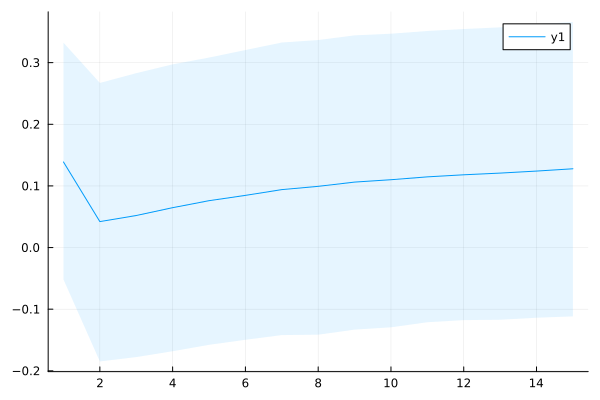

In [359]:
errorline(1:1:15,y,cenetertype=:median, errortype=:percentile, percentiles=[10,90], errorstyle=:ribbon)

In [117]:
cov  = model.S_OLS

4×4 Matrix{Float64}:
  0.00194073   7.18747e-5   -0.00129464    0.00985649
  7.18747e-5   0.00493072   -0.000902465  -0.0103872
 -0.00129464  -0.000902465   0.0019109    -0.000609731
  0.00985649  -0.0103872    -0.000609731   0.779603

In [133]:
model.Σ

10000×4×4 Array{Float64, 3}:
[:, :, 1] =
 2.41585e-5   2.04693e-6  -1.68111e-5  6.15964e-5
 1.7516e-5    2.2055e-6   -9.51821e-6  0.000108264
 2.12699e-5   9.83162e-6  -1.32765e-5  7.77304e-5
 2.06209e-5  -1.68569e-6  -9.73495e-6  0.0001267
 1.78892e-5   1.32537e-6  -1.14759e-5  0.000142455
 1.85878e-5  -2.98609e-6  -1.3577e-5   3.43998e-5
 1.70606e-5   3.68198e-7  -1.14348e-5  4.5289e-5
 1.86365e-5   1.20559e-6  -1.48045e-5  9.04995e-5
 2.23093e-5   8.88263e-7  -1.39703e-5  0.000185306
 1.80349e-5   3.06383e-6  -1.21413e-5  0.000133118
 ⋮                                     
 2.07758e-5  -1.26208e-6  -1.59854e-5  0.00014141
 2.25789e-5   6.4613e-6   -1.40926e-5  7.04501e-5
 2.14624e-5  -7.43714e-7  -1.29126e-5  8.78348e-5
 1.72957e-5   3.53578e-6  -1.1098e-5   8.21456e-5
 1.67072e-5   3.48789e-6  -1.13506e-5  3.19778e-5
 2.49223e-5   4.38257e-6  -1.72843e-5  0.000108413
 1.6695e-5   -1.60165e-6  -1.04601e-5  6.92742e-5
 2.16996e-5   1.88663e-7  -1.58204e-5  0.000137242
 2.05169e-5  -1

In [76]:
sigmas = cov2cor_posterior(model.Σ)



10000×4×4 Array{Float64, 3}:
[:, :, 1] =
 0.00440959   0.10958     -0.678379  0.272117
 0.00431049   0.289972    -0.690506  0.116453
 0.00441954   0.0940911   -0.630145  0.272047
 0.00495096   0.0121628   -0.666403  0.285687
 0.00394453  -0.0550192   -0.625577  0.113237
 0.00473627   0.102508    -0.541488  0.159914
 0.00447191   0.161777    -0.627063  0.427901
 0.00419904   0.131618    -0.62702   0.247555
 0.00461868   0.00526839  -0.670597  0.285962
 0.0041961    0.0405259   -0.601499  0.364305
 ⋮                                   
 0.00435129   0.247019    -0.641908  0.280547
 0.00403771  -0.00808121  -0.63587   0.208675
 0.00418239  -0.0675834   -0.624951  0.260763
 0.00396193   0.0717334   -0.637378  0.092964
 0.00447907  -0.176082    -0.562758  0.324422
 0.0042538    0.0936561   -0.669035  0.293229
 0.00427859  -0.076877    -0.558745  0.385925
 0.00459269   0.130163    -0.687752  0.248895
 0.00461954   0.0319121   -0.69615   0.194869

[:, :, 2] =
  0.10958     0.0072868   -0.45489

In [83]:
summary = posterior_summary(model)


"short_us coefficients"

Quantiles
        parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
            Symbol   Float64   Float64   Float64   Float64   Float64 

             const   -0.0045   -0.0027   -0.0017   -0.0008    0.0010
          short_us    0.9826    1.0268    1.0507    1.0753    1.1211
           real_us   -0.3994   -0.3205   -0.2796   -0.2385   -0.1573
           term_us   -0.0722   -0.0013    0.0335    0.0690    0.1396
  USA_Net_short_us   -0.0088   -0.0020    0.0015    0.0049    0.0116


"real_us coefficients"

Quantiles
        parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
            Symbol   Float64   Float64   Float64   Float64   Float64 

             const   -0.0107   -0.0080   -0.0065   -0.0050   -0.0021
          short_us    0.1105    0.1836    0.2214    0.2586    0.3294
           real_us    0.0172    0.1492    0.2158    0.2828    0.4123
           term_us   -0.0845    0.0260    0.0829    0.1389    0.2465
  USA_Net_short_us   -0.0171   -0.0062   -0.0008    0.0045    0.0157


"term_us coefficients"

Quantiles
        parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
            Symbol   Float64   Float64   Float64   Float64   Float64 

             const    0.0004    0.0022    0.0031    0.0041    0.0058
          short_us   -0.1559   -0.1107   -0.0866   -0.0631   -0.0176
           real_us    0.1061    0.1866    0.2281    0.2687    0.3506
           term_us    0.7998    0.8692    0.9046    0.9395    1.0076
  USA_Net_short_us   -0.0127   -0.0060   -0.0025    0.0010    0.0076


"USA_Net_short_us coefficients"

Quantiles
        parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
            Symbol   Float64   Float64   Float64   Float64   Float64 

             const   -0.0072    0.0287    0.0476    0.0659    0.1031
          short_us   -2.5010   -1.5763   -1.1061   -0.6279    0.2723
           real_us   -2.2605   -0.6021    0.2115    1.0362    2.6445
           term_us   -3.0073   -1.5585   -0.8417   -0.1090    1.2908
  USA_Net_short_us   -0.2021   -0.0657    0.0056    0.0760    0.2086


"correlation matrix"

Quantiles
                         parameters      2.5%     25.0%     50.0%     75.0%    ⋯
                             Symbol   Float64   Float64   Float64   Float64    ⋯

                  short_us_short_us    0.0039    0.0043    0.0045    0.0047    ⋯
                   short_us_real_us   -0.1711   -0.0454    0.0238    0.0915    ⋯
                   short_us_term_us   -0.7684   -0.7092   -0.6734   -0.6352    ⋯
          short_us_USA_Net_short_us    0.0563    0.1884    0.2530    0.3169    ⋯
                   real_us_short_us   -0.1711   -0.0454    0.0238    0.0915    ⋯
                    real_us_real_us    0.0062    0.0068    0.0071    0.0075    ⋯
                    real_us_term_us   -0.4647   -0.3547   -0.2953   -0.2318    ⋯
           real_us_USA_Net_short_us   -0.3540   -0.2339   -0.1685   -0.1000    ⋯
                   term_us_short_us   -0.7684   -0.7092   -0.6734   -0.6352    ⋯
                    term_us_real_us   -0.4647   -0.3547   -0.2953   -0.2318    ⋯
                 

In [71]:
corr_m = cov2cor(model.S_OLS)
stds = sqrt.(diag(model.S_OLS))
corr_m[diagind(corr_m)] = stds
corr_m

4×4 Matrix{Float64}:
  0.0440537   0.0232348  -0.672279    0.253398
  0.0232348   0.0702191  -0.294006   -0.167536
 -0.672279   -0.294006    0.0437138  -0.0157973
  0.253398   -0.167536   -0.0157973   0.882951

In [68]:
0.88^2

0.7744

In [48]:
l = LowerTriangular(corr_m)

4×4 LowerTriangular{Float64, Matrix{Float64}}:
  1.0          ⋅          ⋅          ⋅ 
  0.0232348   1.0         ⋅          ⋅ 
 -0.672279   -0.294006   1.0         ⋅ 
  0.253398   -0.167536  -0.0157973  1.0

In [50]:
tril(corr_m)

4×4 Matrix{Float64}:
  1.0         0.0        0.0        0.0
  0.0232348   1.0        0.0        0.0
 -0.672279   -0.294006   1.0        0.0
  0.253398   -0.167536  -0.0157973  1.0

In [56]:
filter(x -> x != 1.0 && x !=0 ,vec(l))

6-element Vector{Float64}:
  0.02323475092678925
 -0.6722789067716631
  0.2533981061150314
 -0.2940062011376211
 -0.16753569628108012
 -0.015797295413613223